In [192]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [193]:

# # Load the datasets provided by the user
# file_paths = {
#     "balance": "hc100_balance.csv",
#     "hurried_pace": "hc100_hurriedpace.csv",
#     "hurried_pace_mat": "hc100_hurriedpace_mat.csv",
#     "self_pace": "hc100_selfpace.csv",
#     "self_pace_mat": "hc100_selfpace_mat.csv",
#     "self_pace_mat_turn": "hc100_selfpace_matturn.csv",
#     "tandem_gait": "hc100_tandemgait.csv"
# }

# # Load and inspect the files
# dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}
# file_summaries = {name: df.describe(include='all') for name, df in dataframes.items()}

# # Display a summary of the datasets
# file_summaries


In [194]:
# # Select relevant columns from datasets for clustering (example: accelerometer, gyroscope, foot pressure)
# columns_of_interest = [
#     'L Foot Pressure', 'R Foot Pressure', 'Rinsole:Acc_X', 'Rinsole:Acc_Y',
#     'Rinsole:Acc_Z', 'Rinsole:Gyr_X', 'Rinsole:Gyr_Y', 'Rinsole:Gyr_Z', 
#     'RCoP_X', 'RCoP_Y'
# ]

In [195]:
# # Combine the data from all relevant datasets, focusing on common columns of interest
# combined_data = pd.concat([
#     df[columns_of_interest] for name, df in dataframes.items() if set(columns_of_interest).issubset(df.columns)
# ], axis=0, ignore_index=True)

# # Drop rows with missing values for simplicity in this clustering step
# combined_data_cleaned = combined_data.dropna()

# # Standardize the data for clustering
# scaler = StandardScaler()
# standardized_data = scaler.fit_transform(combined_data_cleaned)

# # Dimensionality reduction for visualization (optional)
# pca = PCA(n_components=2)
# pca_data = pca.fit_transform(standardized_data)

# # Determine optimal number of clusters using Elbow Method
# inertia = []
# k_range = range(2, 11)
# for k in k_range:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(standardized_data)
#     inertia.append(kmeans.inertia_)

# # Perform clustering with an optimal number of clusters (default: 3 for simplicity)
# kmeans = KMeans(n_clusters=3, random_state=42)
# clusters = kmeans.fit_predict(standardized_data)

# # Add cluster labels to the cleaned dataset
# combined_data_cleaned['Cluster'] = clusters

# # Summarize the clustering results
# cluster_summary = combined_data_cleaned.groupby('Cluster').mean()

In [196]:

# plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='viridis', s=10)
# plt.colorbar(label='Cluster')
# plt.xlabel('PCA Component 1')
# plt.ylabel('PCA Component 2')
# plt.title('Clustering Visualization (PCA Projection)')
# plt.show()

# # Display cluster centers for further analysis
# cluster_summary

In [197]:
# # Mapping clusters to risk levels (manual interpretation based on centroid analysis)
# # Lower cluster number implies lower risk
# risk_mapping = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}
# combined_data_cleaned["Risk_Level"] = combined_data_cleaned["Cluster"].map(risk_mapping)

# # Summary of risk levels assigned
# risk_level_summary = combined_data_cleaned["Risk_Level"].value_counts()

In [198]:
# risk_level_summary

In [199]:
# # Assuming clustered_df is the integrated dataset with 'Risk_Level' column (Low, Medium, High)
# # Prepare data for modeling
# X = combined_data_cleaned.drop(columns=['Risk_Level'])  # Features
# y = combined_data_cleaned['Risk_Level']  # Target

# # Convert target to numeric for classification
# y_numeric = y.map({'Low Risk': 0, 'Medium Risk': 1, 'High Risk': 2})

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y_numeric, test_size=0.3, random_state=42, stratify=y_numeric)

# # Train a Random Forest Classifier
# rf_model = RandomForestClassifier(random_state=42, n_estimators=100, class_weight='balanced')
# rf_model.fit(X_train, y_train)

# # Predictions
# y_pred = rf_model.predict(X_test)

# # Evaluation
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)
# accuracy = accuracy_score(y_test, y_pred)

# conf_matrix, class_report, accuracy

In [200]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.impute import SimpleImputer
# import pandas as pd

In [201]:

# # Load the data from uploaded files
# files = {
#     "balance": "hc100_balance.csv",
#     "hurried_pace": "hc100_hurriedpace.csv",
#     "hurried_pace_mat": "hc100_hurriedpace_mat.csv",
#     "self_pace": "hc100_selfpace.csv",
#     "self_pace_mat": "hc100_selfpace_mat.csv",
#     "self_pace_mat_turn": "hc100_selfpace_matturn.csv",
#     "tandem_gait": "hc100_tandemgait.csv"
# }

# # Load all files into a dictionary of DataFrames
# dataframes = {name: pd.read_csv(path) for name, path in files.items()}

# # Concatenate all dataframes
# combined_data = pd.concat(dataframes.values(), axis=1)

# # Drop duplicate columns (if they exist)
# combined_data = combined_data.loc[:, ~combined_data.columns.duplicated()]

# # Impute missing values with mean
# imputer = SimpleImputer(strategy='mean')
# data_imputed = imputer.fit_transform(combined_data.select_dtypes(include=['float64', 'int64']))

# # Standardize the numerical features
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data_imputed)

# # Convert back to DataFrame for interpretability
# data_scaled_df = pd.DataFrame(data_scaled, columns=combined_data.select_dtypes(include=['float64', 'int64']).columns)

# data_scaled_df.head()


In [202]:
# # Revised feature selection based on inspected columns
# selected_features = [
#     # Common metrics for stability and motion from different datasets
#     'LowerBack_Acc_X', 'LowerBack_Acc_Y', 'LowerBack_Acc_Z',
#     'LowerBack_Pitch', 'LowerBack_Roll', 'LowerBack_Yaw',
#     'R_LatShank_Acc_X', 'R_LatShank_Acc_Y', 'R_LatShank_Acc_Z',
#     'L_LatShank_Acc_X', 'L_LatShank_Acc_Y', 'L_LatShank_Acc_Z',
#     'R_Ankle_Acc_X', 'R_Ankle_Acc_Y', 'R_Ankle_Acc_Z',
#     'L_Ankle_Acc_X', 'L_Ankle_Acc_Y', 'L_Ankle_Acc_Z',
#     'R_DorsalFoot_Acc_X', 'R_DorsalFoot_Acc_Y', 'R_DorsalFoot_Acc_Z',
#     'L_DorsalFoot_Acc_X', 'L_DorsalFoot_Acc_Y', 'L_DorsalFoot_Acc_Z'
# ]

# # Extract relevant columns from datasets
# relevant_data = pd.concat([df[selected_features] for name, df in dataframes.items() if set(selected_features).issubset(df.columns)], axis=0)

# # Handle missing values in the relevant data
# relevant_data_imputed = imputer.fit_transform(relevant_data)

# # Standardize the data for clustering
# relevant_data_scaled = scaler.fit_transform(relevant_data_imputed)

# # Convert back to DataFrame
# relevant_data_scaled_df = pd.DataFrame(relevant_data_scaled, columns=selected_features)

# # Display a sample of the preprocessed data
# relevant_data_scaled_df.head()


In [203]:
import pandas as pd

# Load the uploaded datasets
file_paths = {
   "hc100_balance": "synpse_data/Version_1/control_participants/csv_files/hc100_balance.csv",
    "hc100_hurriedpace": "synpse_data/Version_1/control_participants/csv_files/hc100_hurriedpace.csv",
    "hc100_hurriedpace_mat":"synpse_data/Version_1/control_participants/csv_files/hc100_hurriedpace_mat.csv",
    "hc100_selfpace": "synpse_data/Version_1/control_participants/csv_files/hc100_selfpace.csv",
    "hc100_selfpace_mat": "synpse_data/Version_1/control_participants/csv_files/hc100_selfpace_mat.csv",
    "hc100_selfpace_matturn": "synpse_data/Version_1/control_participants/csv_files/hc100_selfpace_matturn.csv",
    "hc100_tandemgait":"synpse_data/Version_1/control_participants/csv_files/hc100_tandemgait.csv",
    "hc100_tug": "synpse_data/Version_1/control_participants/csv_files/hc100_tug.csv",
}

# Read all datasets into dataframes
dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Displaying the column names of each dataset for an overview
datasets_overview = {name: df.columns.tolist() for name, df in dataframes.items()}

datasets_overview


C:\Users\dhruv\AppData\Local\Temp\ipykernel_8620\3520883113.py:16: DtypeWarning: Columns (7,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes = {name: pd.read_csv(path) for name, path in file_paths.items()}


{'hc100_balance': ['Time',
  'GeneralEvent',
  'ClinicalEvent',
  'L Foot Contact',
  'R Foot Contact',
  'L Foot Pressure',
  'R Foot Pressure',
  'Walkway_X',
  'Walkway_Y',
  'WalkwayPressureLevel',
  'WalkwayFoot',
  'LowerBack_Acc_X',
  'LowerBack_Acc_Y',
  'LowerBack_Acc_Z',
  'LowerBack_FreeAcc_E',
  'LowerBack_FreeAcc_N',
  'LowerBack_FreeAcc_U',
  'LowerBack_Gyr_X',
  'LowerBack_Gyr_Y',
  'LowerBack_Gyr_Z',
  'LowerBack_Mag_X',
  'LowerBack_Mag_Y',
  'LowerBack_Mag_Z',
  'LowerBack_VelInc_X',
  'LowerBack_VelInc_Y',
  'LowerBack_VelInc_Z',
  'LowerBack_OriInc_q0',
  'LowerBack_OriInc_q1',
  'LowerBack_OriInc_q2',
  'LowerBack_OriInc_q3',
  'LowerBack_Roll',
  'LowerBack_Pitch',
  'LowerBack_Yaw',
  'R_Wrist_Acc_X',
  'R_Wrist_Acc_Y',
  'R_Wrist_Acc_Z',
  'R_Wrist_FreeAcc_E',
  'R_Wrist_FreeAcc_N',
  'R_Wrist_FreeAcc_U',
  'R_Wrist_Gyr_X',
  'R_Wrist_Gyr_Y',
  'R_Wrist_Gyr_Z',
  'R_Wrist_Mag_X',
  'R_Wrist_Mag_Y',
  'R_Wrist_Mag_Z',
  'R_Wrist_VelInc_X',
  'R_Wrist_VelInc_Y',
 

In [204]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np

# Consolidate relevant features from multiple datasets (example: accelerations, pressures, gait metrics)
selected_features = []
feature_names = [
    "LowerBack_Acc_X", "LowerBack_Acc_Y", "LowerBack_Acc_Z",
    "LPressure1", "LPressure2", "LPressure3", "LPressure4",
    "RPressure1", "RPressure2", "RPressure3", "RPressure4",
    "LTotalForce", "RTotalForce"
]

# Collect and merge selected features from all datasets into a unified DataFrame
consolidated_data = pd.DataFrame()

for name, df in dataframes.items():
    common_features = [col for col in feature_names if col in df.columns]
    if common_features:
        selected_data = df[common_features]
        consolidated_data = pd.concat([consolidated_data, selected_data], axis=0)

# Impute missing values with the mean and normalize data
imputer = SimpleImputer(strategy="mean")
scaler = StandardScaler()

consolidated_data_imputed = imputer.fit_transform(consolidated_data)
consolidated_data_scaled = scaler.fit_transform(consolidated_data_imputed)

# Convert back to DataFrame for better handling
consolidated_data_processed = pd.DataFrame(
    consolidated_data_scaled,
    columns=consolidated_data.columns
)

consolidated_data_processed.describe()


,LowerBack_Acc_X,LowerBack_Acc_Y,LowerBack_Acc_Z,LPressure1,LPressure2,LPressure3,LPressure4,RPressure1,RPressure2,RPressure3,RPressure4,LTotalForce,RTotalForce
count,3.920700e+04,3.920700e+04,3.920700e+04,3.920700e+04,3.920700e+04,3.920700e+04,39207.000000,3.920700e+04,3.920700e+04,3.920700e+04,3.920700e+04,39207.000000,3.920700e+04
mean,7.850820e-16,-1.159863e-17,7.539107e-17,1.739794e-17,-1.913773e-16,-6.089279e-17,0.000000,2.203739e-16,9.278901e-17,-3.479588e-16,4.059519e-17,0.000000,6.379245e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00
min,-5.857417e+00,-9.618901e+00,-4.508461e+00,-1.240934e+00,-1.144364e+00,-9.789828e-01,-1.097580,-1.280879e+00,-1.436894e+00,-1.180316e+00,-1.326742e+00,-1.496133,-1.588627e+00
25%,-2.756497e-01,-3.406322e-01,-9.273441e-01,-9.850411e-01,-8.875426e-01,-8.967203e-01,-0.848432,-1.090882e+00,-9.353351e-01,-1.043135e+00,-1.021045e+00,-0.559252,-6.788758e-01
50%,8.002578e-02,2.879728e-02,5.241010e-02,3.852839e-02,-2.281037e-16,-1.563579e-01,0.000000,4.910321e-02,1.304773e-01,-2.436833e-16,1.253202e-01,-0.047235,6.305702e-02
75%,2.660805e-01,3.466262e-01,7.294253e-01,4.223670e-01,3.965671e-01,3.372170e-01,0.272731,5.557631e-01,5.693413e-01,5.344528e-01,5.074417e-01,0.704449,5.709277e-01
max,8.002336e+00,6.531285e+00,7.933851e+00,6.051999e+00,7.202348e+00,5.190704e+00,5.816261,5.179035e+00,4.957981e+00,4.992852e+00,4.710779e+00,3.017602,3.017539e+00


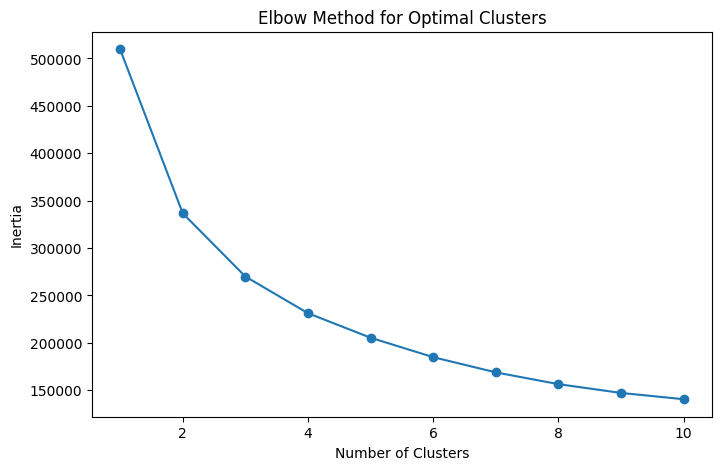

In [205]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the elbow method
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(consolidated_data_processed)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [206]:
# Train k-Means with the recommended 4 clusters
optimal_clusters = 3
kmeans_model = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
cluster_labels = kmeans_model.fit_predict(consolidated_data_processed)

# Add the cluster labels to the processed data for analysis
consolidated_data_processed['Cluster'] = cluster_labels

# Analyze the cluster centers and distribution
cluster_centers = pd.DataFrame(
    kmeans_model.cluster_centers_, 
    columns=consolidated_data_processed.columns[:-1]
)
cluster_distribution = consolidated_data_processed['Cluster'].value_counts()

cluster_centers, cluster_distribution


(   LowerBack_Acc_X  LowerBack_Acc_Y  LowerBack_Acc_Z  LPressure1  LPressure2  \
 0        -0.021723         0.515132         0.337277   -1.058343   -1.011717   
 1         0.008780        -0.001069        -0.230838   -0.083695   -0.116280   
 2        -0.004541        -0.499680         0.347640    1.278445    1.328477   
 
    LPressure3  LPressure4  RPressure1  RPressure2  RPressure3  RPressure4  \
 0   -0.897955   -0.993190    1.226785    1.186102    1.353812    1.307236   
 1   -0.197230   -0.169363    0.000835    0.045589   -0.068874   -0.007380   
 2    1.454791    1.466038   -1.199901   -1.291414   -1.119493   -1.254338   
 
    LTotalForce  RTotalForce  
 0    -1.055847     1.158625  
 1    -0.075228    -0.025538  
 2     1.251179    -1.056041  ,
 Cluster
 1    23424
 2     7992
 0     7791
 Name: count, dtype: int64)

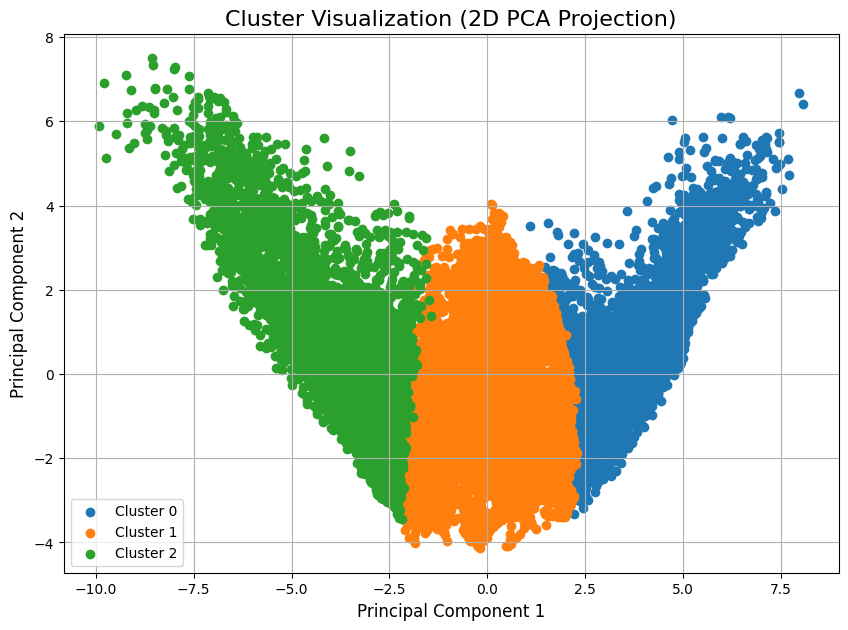

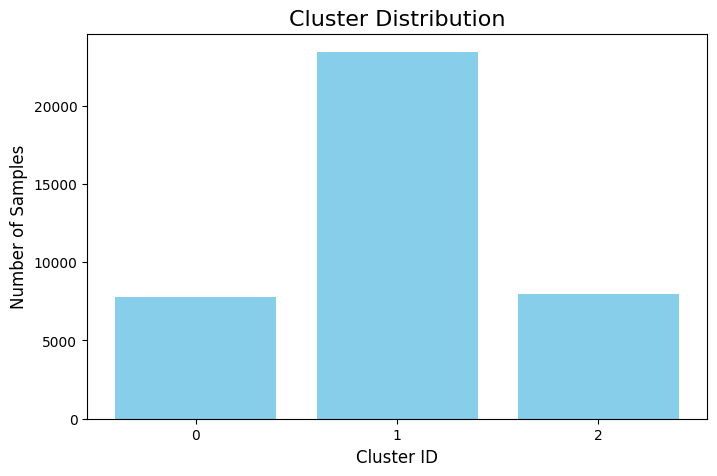

In [207]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce the dimensions to 2 for visualization
pca = PCA(n_components=2, random_state=42)
data_2d = pca.fit_transform(consolidated_data_processed.drop(columns=['Cluster']))

# Create a scatter plot of the clusters
plt.figure(figsize=(10, 7))
for cluster_id in range(optimal_clusters):
    cluster_points = data_2d[consolidated_data_processed['Cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {cluster_id}")

# Add titles and labels
plt.title('Cluster Visualization (2D PCA Projection)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Visualize the cluster distribution
plt.figure(figsize=(8, 5))
plt.bar(cluster_distribution.index, cluster_distribution.values, color='skyblue')
plt.title('Cluster Distribution', fontsize=16)
plt.xlabel('Cluster ID', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.xticks(cluster_distribution.index)
plt.show()


In [208]:
# Step 1: Analyze Cluster Characteristics
cluster_characteristics = consolidated_data_processed.groupby('Cluster').mean()

# Step 2: Assign Risk Levels to Clusters
# Assume clusters are sorted by risk, with higher mean values in certain features indicating higher risk
# This is a hypothetical assignment; adjust based on domain knowledge
risk_levels = {0: "Low Risk", 1: "Medium Risk", 2: "High Risk"}
consolidated_data_processed['Risk_Level'] = consolidated_data_processed['Cluster'].map(risk_levels)

# Step 3: Build a Risk Scoring System
# Use the distance to cluster centers as a risk score
from scipy.spatial.distance import cdist

cluster_distances = cdist(
    consolidated_data_processed.drop(columns=['Cluster', 'Risk_Level']),
    kmeans_model.cluster_centers_
)
risk_scores = cluster_distances.min(axis=1)
consolidated_data_processed['Risk_Score'] = risk_scores

# Step 4: Summarize Results
# Return descriptive statistics and an example of the processed dataset
cluster_summary = consolidated_data_processed.groupby('Risk_Level').mean()
example_rows = consolidated_data_processed.head()

# Output cluster characteristics, risk levels, and a few example rows
cluster_characteristics, cluster_summary, example_rows


(         LowerBack_Acc_X  LowerBack_Acc_Y  LowerBack_Acc_Z  LPressure1  \
 Cluster                                                                  
 0              -0.021426         0.514898         0.337420   -1.058474   
 1               0.008925        -0.000706        -0.230797   -0.083832   
 2              -0.005273        -0.499880         0.347516    1.277560   
 
          LPressure2  LPressure3  LPressure4  RPressure1  RPressure2  \
 Cluster                                                               
 0         -1.011771   -0.897977   -0.993181    1.227814    1.186907   
 1         -0.116420   -0.197339   -0.169535    0.001029    0.045853   
 2          1.327544    1.453779    1.465098   -1.199950   -1.291448   
 
          RPressure3  RPressure4  LTotalForce  RTotalForce  
 Cluster                                                    
 0          1.354918    1.308019    -1.055729     1.158615  
 1         -0.068649   -0.007049    -0.075810    -0.024920  
 2         -1.119

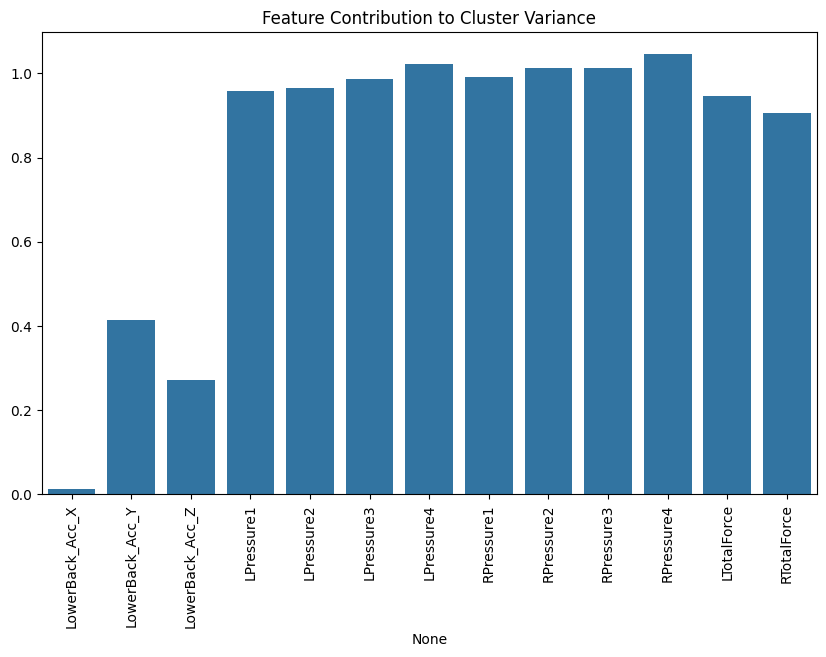

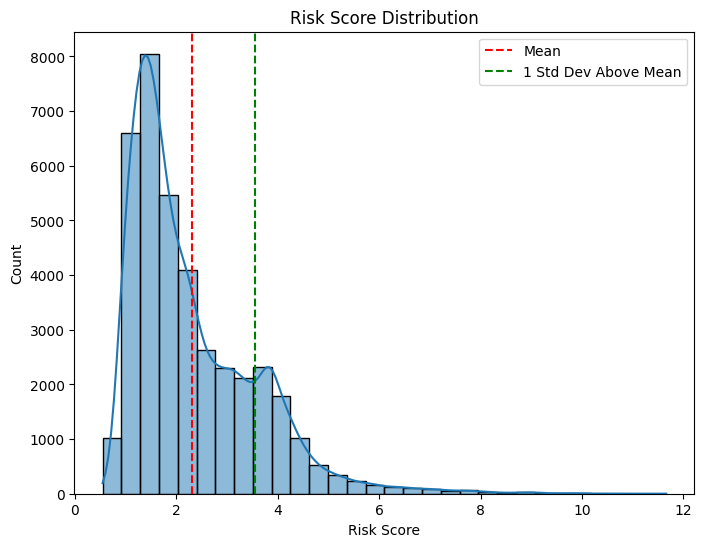

,LowerBack_Acc_X,LowerBack_Acc_Y,LowerBack_Acc_Z,LPressure1,LPressure2,LPressure3,LPressure4,RPressure1,RPressure2,RPressure3,RPressure4,LTotalForce,RTotalForce,Cluster,Risk_Level,Risk_Score,Refined_High_Risk,Anomaly,Final_Risk
0,0.185182,0.178932,-1.282432,0.0,-2.281037e-16,0.0,0.0,2.250022e-16,0.0,-2.436833e-16,0.0,0.0,0.0,1,Medium Risk,1.127238,False,False,Medium Risk
1,0.207244,0.119146,-1.164312,0.0,-2.281037e-16,0.0,0.0,2.250022e-16,0.0,-2.436833e-16,0.0,0.0,0.0,1,Medium Risk,1.013169,False,False,Medium Risk
2,0.230983,0.118243,-1.186752,0.0,-2.281037e-16,0.0,0.0,2.250022e-16,0.0,-2.436833e-16,0.0,0.0,0.0,1,Medium Risk,1.038594,False,False,Medium Risk
3,0.190374,0.137650,-1.176289,0.0,-2.281037e-16,0.0,0.0,2.250022e-16,0.0,-2.436833e-16,0.0,0.0,0.0,1,Medium Risk,1.023423,False,False,Medium Risk
4,0.224371,0.121601,-1.172083,0.0,-2.281037e-16,0.0,0.0,2.250022e-16,0.0,-2.436833e-16,0.0,0.0,0.0,1,Medium Risk,1.024093,False,False,Medium Risk


In [209]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

# Step 1: Feature Importance Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=consolidated_data_processed.columns[:-3], 
            y=kmeans_model.cluster_centers_.std(axis=0))
plt.title("Feature Contribution to Cluster Variance")
plt.xticks(rotation=90)
plt.show()

# Step 2: Visualize Risk Score Distribution
plt.figure(figsize=(8, 6))
sns.histplot(consolidated_data_processed['Risk_Score'], bins=30, kde=True)
plt.axvline(x=consolidated_data_processed['Risk_Score'].mean(), color='r', linestyle='--', label='Mean')
plt.axvline(x=consolidated_data_processed['Risk_Score'].mean() + consolidated_data_processed['Risk_Score'].std(),
            color='g', linestyle='--', label='1 Std Dev Above Mean')
plt.legend()
plt.title("Risk Score Distribution")
plt.xlabel("Risk Score")
plt.ylabel("Count")
plt.show()

high_risk_threshold = consolidated_data_processed['Risk_Score'].quantile(0.95)  # Top 5% as high risk
consolidated_data_processed['Refined_High_Risk'] = consolidated_data_processed['Risk_Score'] > high_risk_threshold

# Step 3: Anomaly Detection with Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
anomaly_labels = isolation_forest.fit_predict(consolidated_data_processed.drop(columns=['Cluster', 'Risk_Level', 'Risk_Score', 'Refined_High_Risk']))
consolidated_data_processed['Anomaly'] = (anomaly_labels == -1)

# Step 4: Combine Risk Levels and Anomalies
consolidated_data_processed['Final_Risk'] = consolidated_data_processed.apply(
    lambda row: 'High Risk' if row['Refined_High_Risk'] or row['Anomaly'] else row['Risk_Level'], axis=1
)

# Step 5: Visualize High-Risk Individuals
# high_risk_individuals = consolidated_data_processed[consolidated_data_processed['Final_Risk'] == 'High Risk']
# plt.figure(figsize=(8, 6))
# sns.scatterplot(data=high_risk_individuals, x='Risk_Score', y=high_risk_individuals.index, hue='Risk_Level')
# plt.title("High-Risk Individuals")
# plt.xlabel("Risk Score")
# plt.ylabel("Steps")
# plt.show()

# Output final data
consolidated_data_processed.head()


In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for cluster centers
plt.figure(figsize=(12, 8))
sns.heatmap(
    pd.DataFrame(kmeans_model.cluster_centers_, columns=consolidated_data_processed.columns[:-3]),
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True
)
plt.title("Cluster Centers Heatmap")
plt.xlabel("Features")
plt.ylabel("Clusters")
plt.show()


ValueError: Shape of passed values is (3, 13), indices imply (3, 16)

<Figure size 1200x800 with 0 Axes>

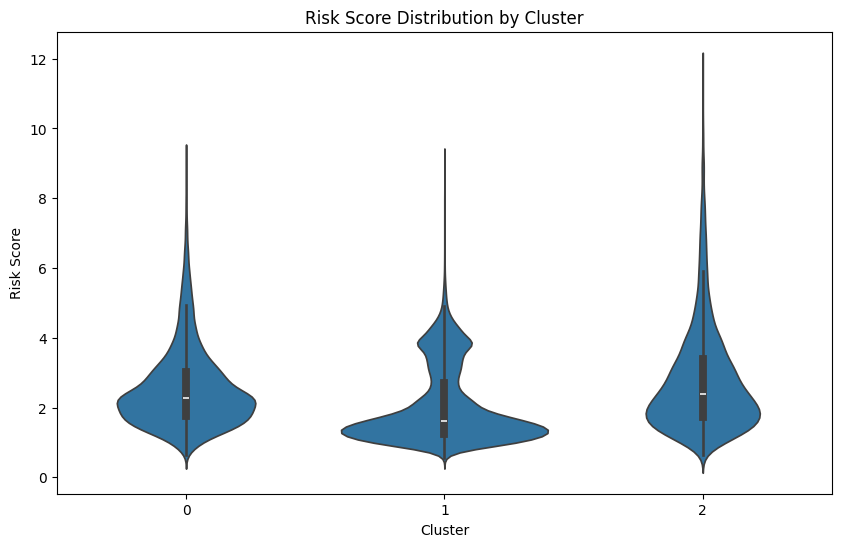

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x="Cluster", y="Risk_Score", data=consolidated_data_processed)
plt.title("Risk Score Distribution by Cluster")
plt.xlabel("Cluster")
plt.ylabel("Risk Score")
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Extract features for evaluation
features = consolidated_data_processed.drop(columns=['Cluster', 'Risk_Level', 'Risk_Score', 'Final_Risk'])

# Silhouette Score
silhouette_avg = silhouette_score(features, consolidated_data_processed['Cluster'])

# Davies-Bouldin Index
davies_bouldin = davies_bouldin_score(features, consolidated_data_processed['Cluster'])

print(f"Silhouette Score: {silhouette_avg}")
print(f"Davies-Bouldin Index: {davies_bouldin}")

Silhouette Score: 0.3110383064751513
Davies-Bouldin Index: 1.2495417274365122
